In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import logit
from matplotlib.ticker import MaxNLocator

In [82]:
def base_RWA(PD=0.01, LGD=0.4, EAD=1_000_000, R=0.15, M=1,output=False):
    """RWA calculation for given R,M"""
    b = (0.11852 - 0.05478 * np.log(PD)) ** 2
    ninety_nine_percentile_default_risk = (norm.ppf(PD) + np.sqrt(R) * norm.ppf(0.999)) / np.sqrt(1 - R)
    expected_default_risk = PD * LGD
    maturity_adjustment = (1 + (M - 2.5) * b) / (1 - 1.5 * b)
    K = (LGD * norm.cdf(ninety_nine_percentile_default_risk) - expected_default_risk) * maturity_adjustment
    if output:
        print(f"b = {b}")
        print (f"K = {K}")
    return 12.5 * EAD * K


def climate_RWA(c):
    """climate adjusted RWA calculation for given R,M"""
    climatePD = 1/(1+np.exp(-(logit(0.01)+c)))
    climateLGD = norm.cdf(norm.ppf(climatePD)-norm.ppf(0.01)+norm.ppf(0.01*0.4))
    climateLGD /= 0.01
    return base_RWA(PD=climatePD, LGD=climateLGD)

In [71]:
climate_RWA(0)

501323.78277373174

In [84]:
base_RWA(output=True)

b = 0.13748613089693737
K = 0.04010590262189846


501323.78277373075

In [74]:
climate_rwa_ratio =[climate_RWA(c)/base_RWA() for c in np.linspace(0,2,100)]

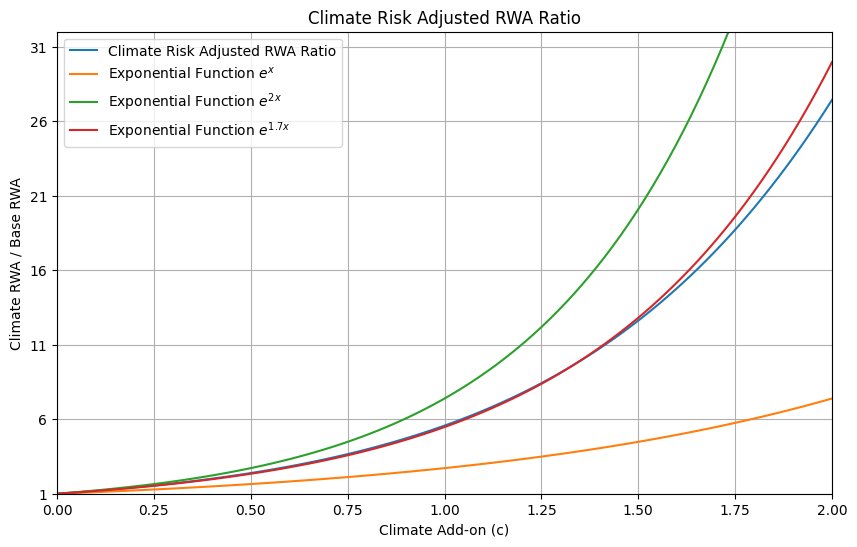

In [109]:
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0,2,100),climate_rwa_ratio,label="Climate Risk Adjusted RWA Ratio")
plt.plot(np.linspace(0,2,100),np.exp(np.linspace(0,2,100)),label="Exponential Function $e^x$")
plt.plot(np.linspace(0,2,100),np.exp(2*np.linspace(0,2,100)),label="Exponential Function $e^{2x}$")
plt.plot(np.linspace(0,2,100),np.exp(1.7*np.linspace(0,2,100)),label="Exponential Function $e^{1.7x}$")
plt.title("Climate Risk Adjusted RWA Ratio")
plt.ylabel("Climate RWA / Base RWA")
plt.xlabel("Climate Add-on (c)")
plt.ylim(1, 32)
plt.xlim(0,2)
plt.grid(True)
plt.legend()
plt.yticks(np.arange(1, 32, 5))
plt.show()